In [1]:
import numpy as np
import pandas as pd

In [24]:
train_data=pd.read_csv('digit-recognizer/train.csv')

In [77]:
train_data=train_data[:1000]
print(train_data.shape)

(1000, 785)


In [78]:
train_X=train_data.drop('label',axis=1)
train_Y=train_data['label']

In [41]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0) #by default step size is 1000 and perplexcity

In [80]:
tsne_data=model.fit_transform(train_X)  #dimention reduction to 2-dimentional

In [81]:
tsne_data.shape

(1000, 2)

In [82]:
tsne_data=np.vstack((tsne_data.T,train_Y)).T

In [85]:
tsne_data.shape

(1000, 3)

In [88]:
tsne_data=pd.DataFrame(tsne_data,columns=('d1','d2','label'))

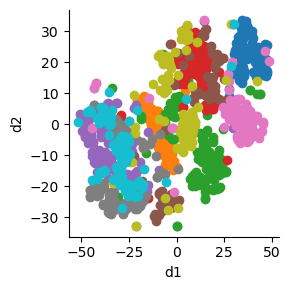

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(tsne_data,hue='label').map(plt.scatter,'d1','d2')
plt.show()

In [102]:
test_data=pd.read_csv('digit-recognizer/test.csv')


In [104]:
test_data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [132]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

X=tsne_data.drop('label',axis=1)
Y=tsne_data['label']
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=6)  #splitting X,Y into train,test

train_x,cv_x,train_y,cv_y=train_test_split(train_x,train_y,test_size=0.1,random_state=5) #split train into train and cross-validation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k=0
bestscore=0;
for i in range(1,11): 
    knn=KNeighborsClassifier(i)
    knn.fit(train_x,train_y)
    prediction=knn.predict(cv_x)
    score=accuracy_score(cv_y,prediction)
    if score>=bestscore:
        best_k=i
        bestscore=score

print('best_k= '+str(best_k)+' Best Accuracy = '+str(bestscore*100))

knn=KNeighborsClassifier(best_k)
knn.fit(train_x,train_y)
prediction=knn.predict(test_x)
print('Accuracy Score on test data = '+str(accuracy_score(prediction,test_y)))
print('Accuracy Percentage = '+str(100*accuracy_score(prediction,test_y)))

best_k= 1 Best Accuracy = 90.0
Accuracy Score on test data = 0.895
Accuracy Percentage = 89.5
